In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
from utils import scatter_plot, qqplot

# Import Dataset

In [2]:
hydroswot = pd.read_csv('./HYDRoSWOT/SWOT_ADCP_Dataset.csv', converters={'site_no': str}, low_memory=False)
hydroswot.shape

(223022, 75)

In [4]:
candidate_columns=['site_no', 'site_tp_cd', 'drain_area_va', 'q_va', 'stage_va', 'stream_wdth_va', 'xsec_area_va', 'mean_vel_va', 'mean_depth_va']
df = hydroswot[candidate_columns]
df = df.dropna(axis=0, how='any', subset=candidate_columns)
df.shape

(48200, 9)

In [5]:
df = df[(df != 0).all(axis=1)]
print(df.shape)
df['site_no'].value_counts().describe()

(48146, 9)


count    5477.000000
mean        8.790579
std        10.822753
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       155.000000
Name: site_no, dtype: float64

In [6]:
hydro_pos_q = pd.DataFrame()
for site, group in df.groupby("site_no"):
   if (group["q_va"].values > 0).all():
        hydro_pos_q = pd.concat([hydro_pos_q, group], ignore_index=True)

print(hydro_pos_q.shape)
print("site locations with positive discharge: ")
hydro_pos_q['site_no'].value_counts().describe()

(46355, 9)
site locations with positive discharge: 


count    5409.000000
mean        8.569976
std        10.339966
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       155.000000
Name: site_no, dtype: float64

In [7]:
hydro_pos_q = hydro_pos_q[hydro_pos_q['site_tp_cd'].isin(['ST', 'ST-DCH', 'ST-CA'])]
hydro_pos_q.shape

(46203, 9)

In [8]:
hydro_pos_q.describe()

,drain_area_va,q_va,stage_va,stream_wdth_va,xsec_area_va,mean_vel_va,mean_depth_va
count,4.620300e+04,4.620300e+04,46203.000000,46203.000000,46203.000000,46203.000000,46203.000000
mean,2.467800e+04,1.095131e+04,13.546269,237.438866,3347.062832,1.962702,6.570540
std,1.090273e+05,5.974668e+04,60.287592,389.091059,14183.995400,1.668609,7.158269
min,1.000000e-02,1.040000e-01,-21.370000,2.550000,1.080000,-6.990000,0.510000
25%,2.150000e+02,2.426840e+02,3.450000,69.964500,195.660000,0.870000,2.651000
50%,7.880000e+02,8.251930e+02,5.740000,123.310000,528.511000,1.644000,4.414000
75%,3.139000e+03,3.138564e+03,10.400000,245.275000,1576.836500,2.712000,7.705500
max,1.144500e+06,2.257500e+06,2991.380000,16361.950000,357000.000000,95.000000,118.770000


In [9]:
hydro_pos_q.reset_index(drop=True, inplace=True)

In [10]:
idx = hydro_pos_q['xsec_area_va'] / hydro_pos_q['stream_wdth_va'] - hydro_pos_q['mean_depth_va']

pct = 0.0001
hydro_subset = hydro_pos_q[(idx > idx.quantile(pct)) & (idx < idx.quantile(1-pct))]

NSE: 0.9904, R2: 0.9915, PBias: -3.4517, MSE: 0.6980


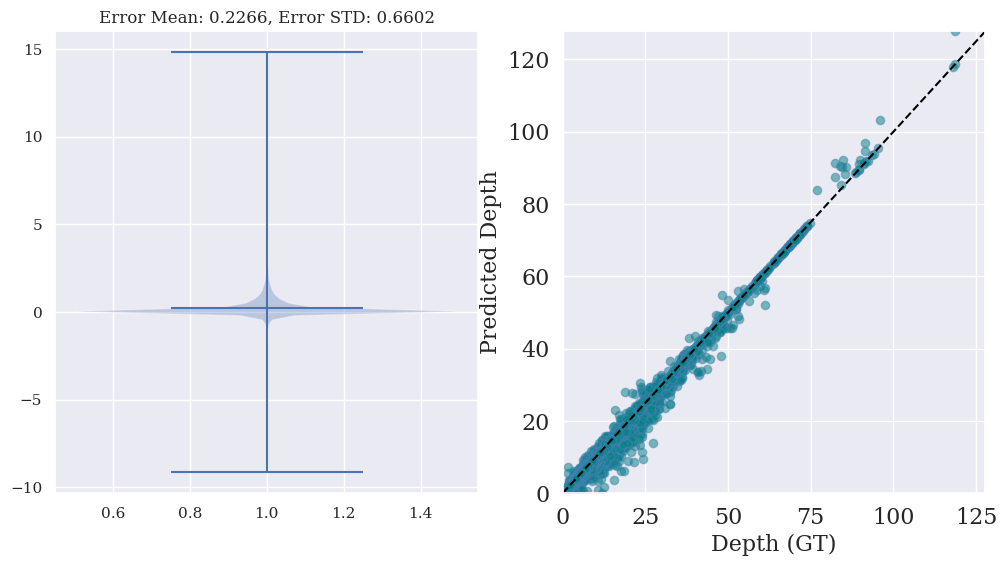

In [11]:
scatter_plot(hydro_subset['mean_depth_va'], hydro_subset['xsec_area_va'] / hydro_subset['stream_wdth_va'])

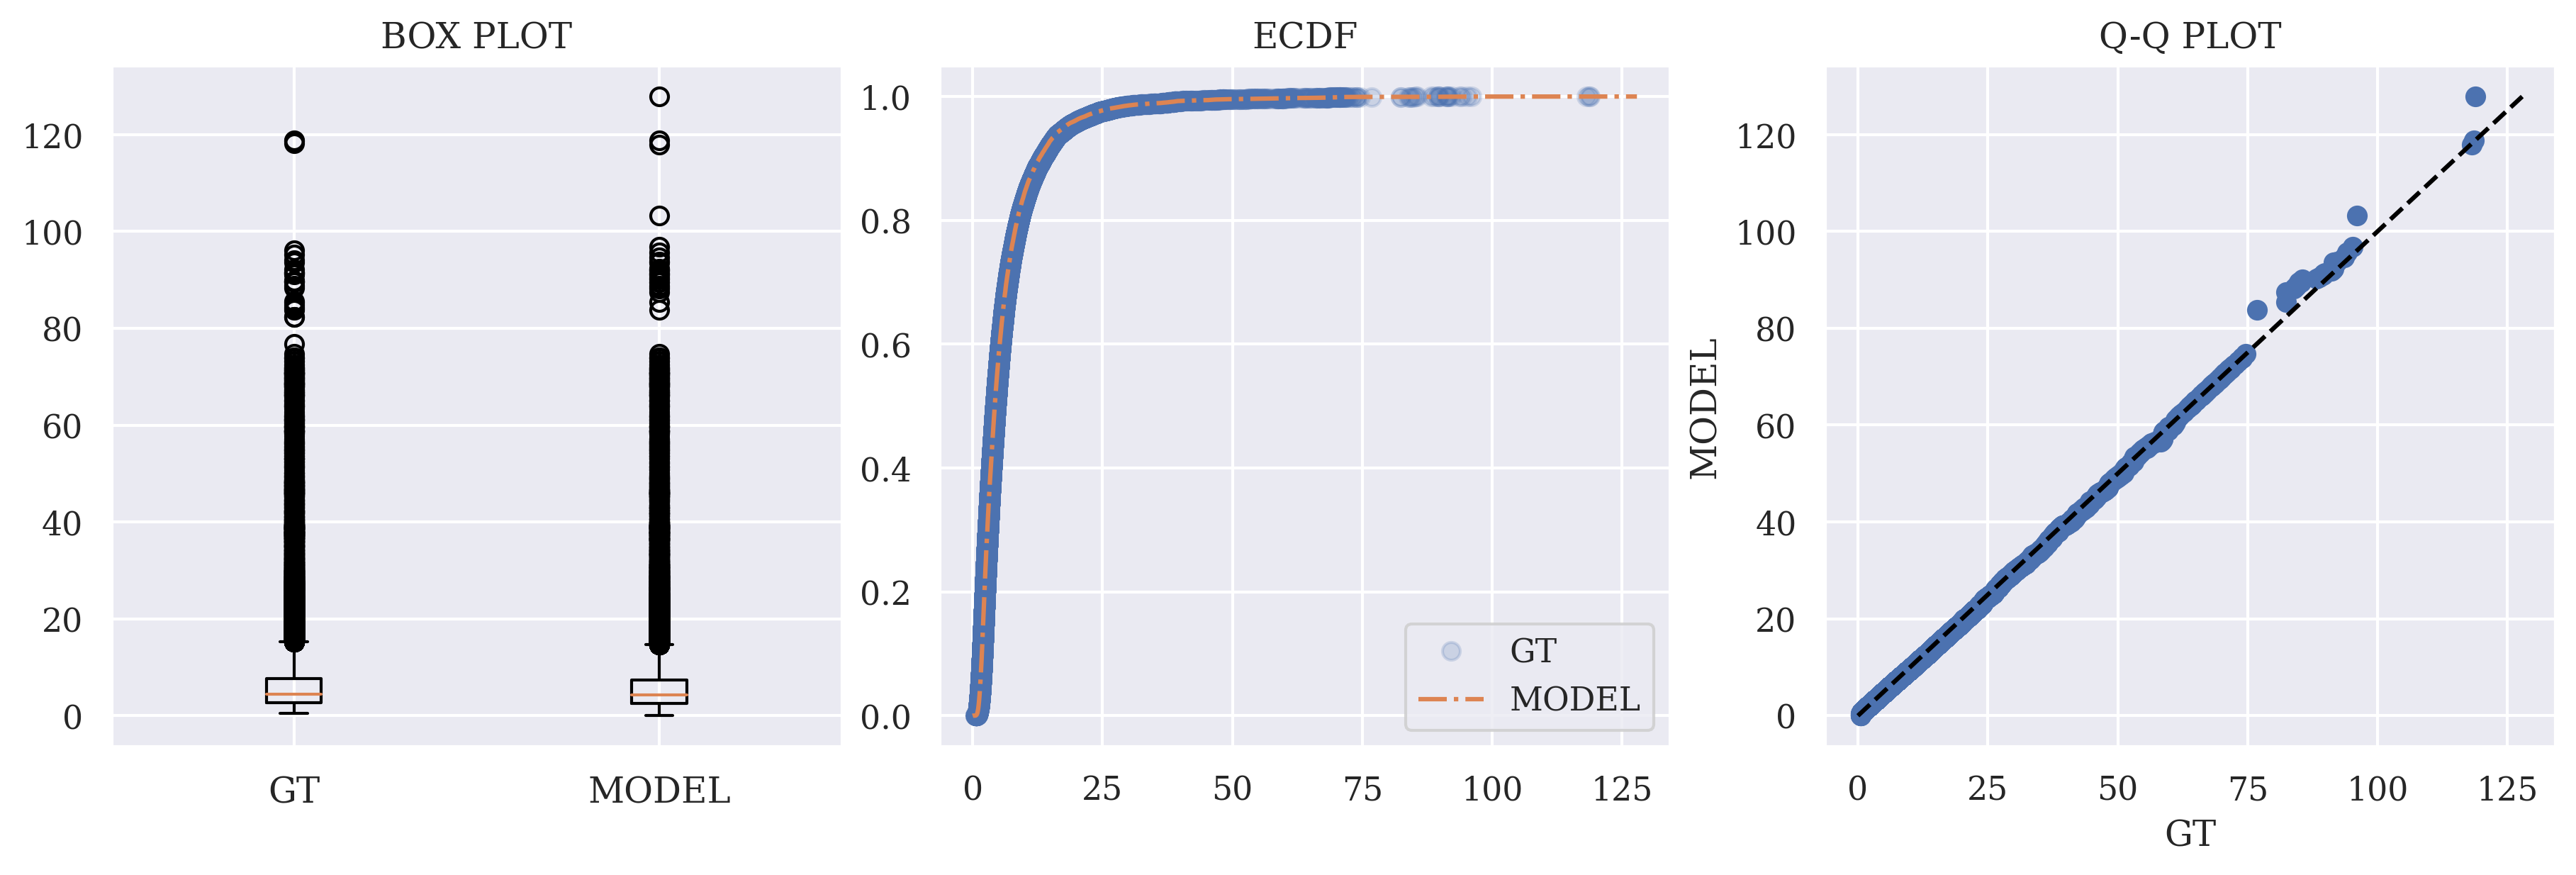

In [12]:
qqplot(hydro_subset['mean_depth_va'], hydro_subset['xsec_area_va'] / hydro_subset['stream_wdth_va'])

In [13]:
hydro_subset.reset_index(drop=True, inplace=True)

In [14]:
print(hydro_subset.shape)
hydro_subset['site_no'].value_counts().describe()

(46193, 9)


count    5395.000000
mean        8.562187
std        10.327021
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       155.000000
Name: site_no, dtype: float64

In [15]:
hydro_subset.to_csv('./data/hydroswot_subset.csv', sep=',', encoding='utf-8', index=False)

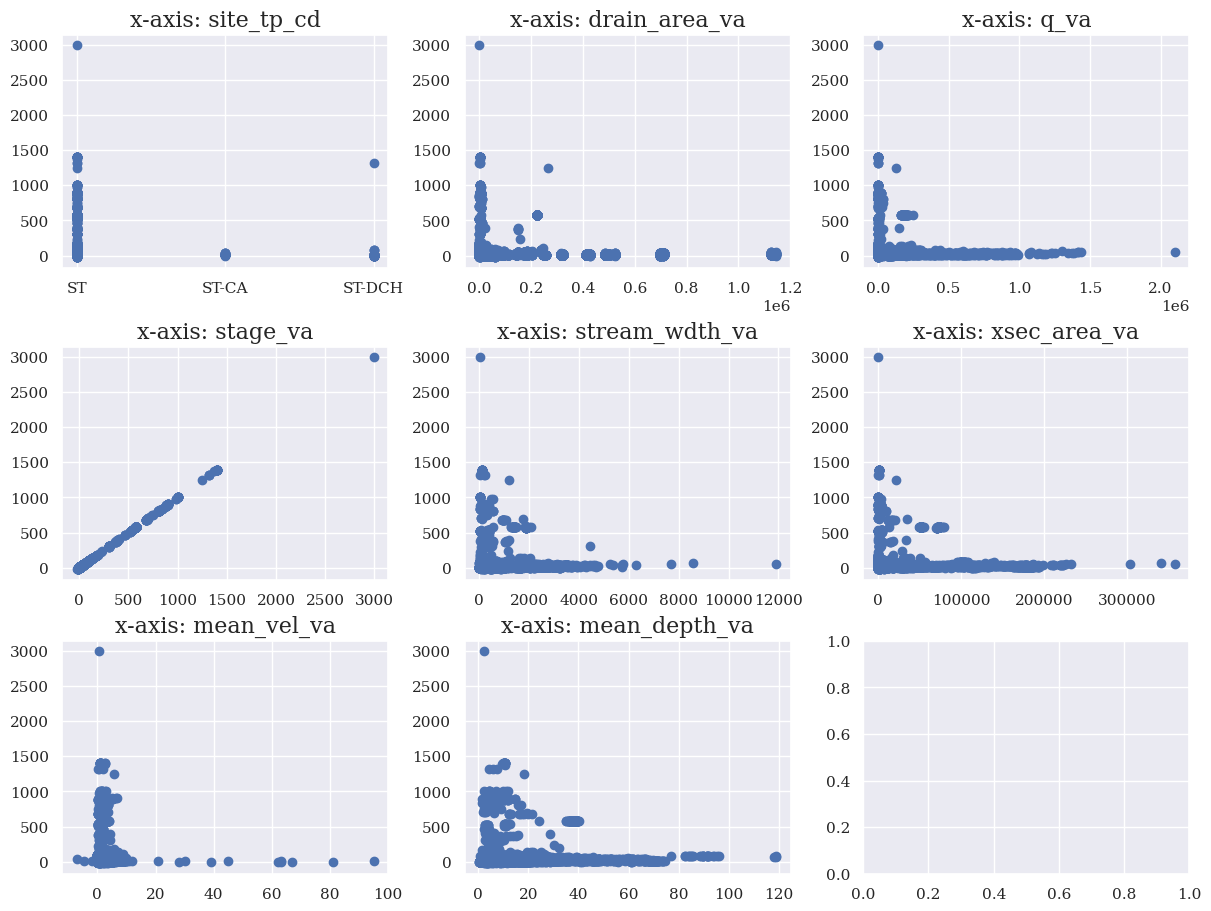

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(12, 9), constrained_layout=True)

for index, (column_name, column_data) in enumerate(hydro_subset.drop(columns=['site_no']).iteritems()):
    # print(column_name, column_data); continue
    i, j = divmod(index, 3)

    axes[i, j].scatter(column_data, hydro_subset['stage_va'])
    axes[i, j].set_title(f'x-axis: {column_name}', fontsize=16)
    # axes[i, j].set_xlabel('')

# plt.savefig(f'{data_root}/results/boxplots.png')
plt.show()

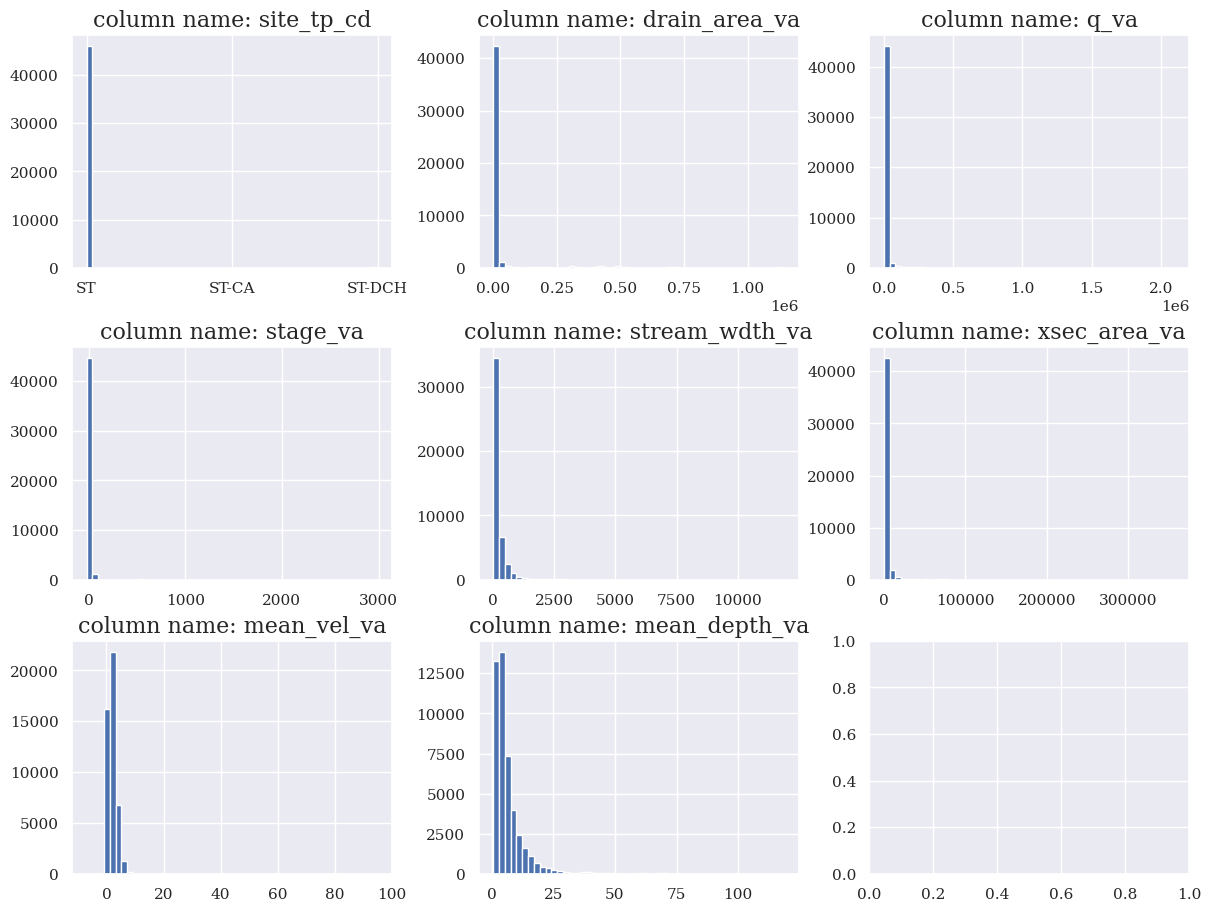

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(12, 9), constrained_layout=True)

for index, (column_name, column_data) in enumerate(hydro_subset.drop(columns=['site_no']).iteritems()):
    i, j = divmod(index, 3)

    axes[i, j].hist(column_data, bins=50)
    axes[i, j].set_title(f'column name: {column_name}', fontsize=16)
    # axes[i, j].set_xlabel('')

# plt.savefig(f'{data_root}/results/boxplots.png')
plt.show()

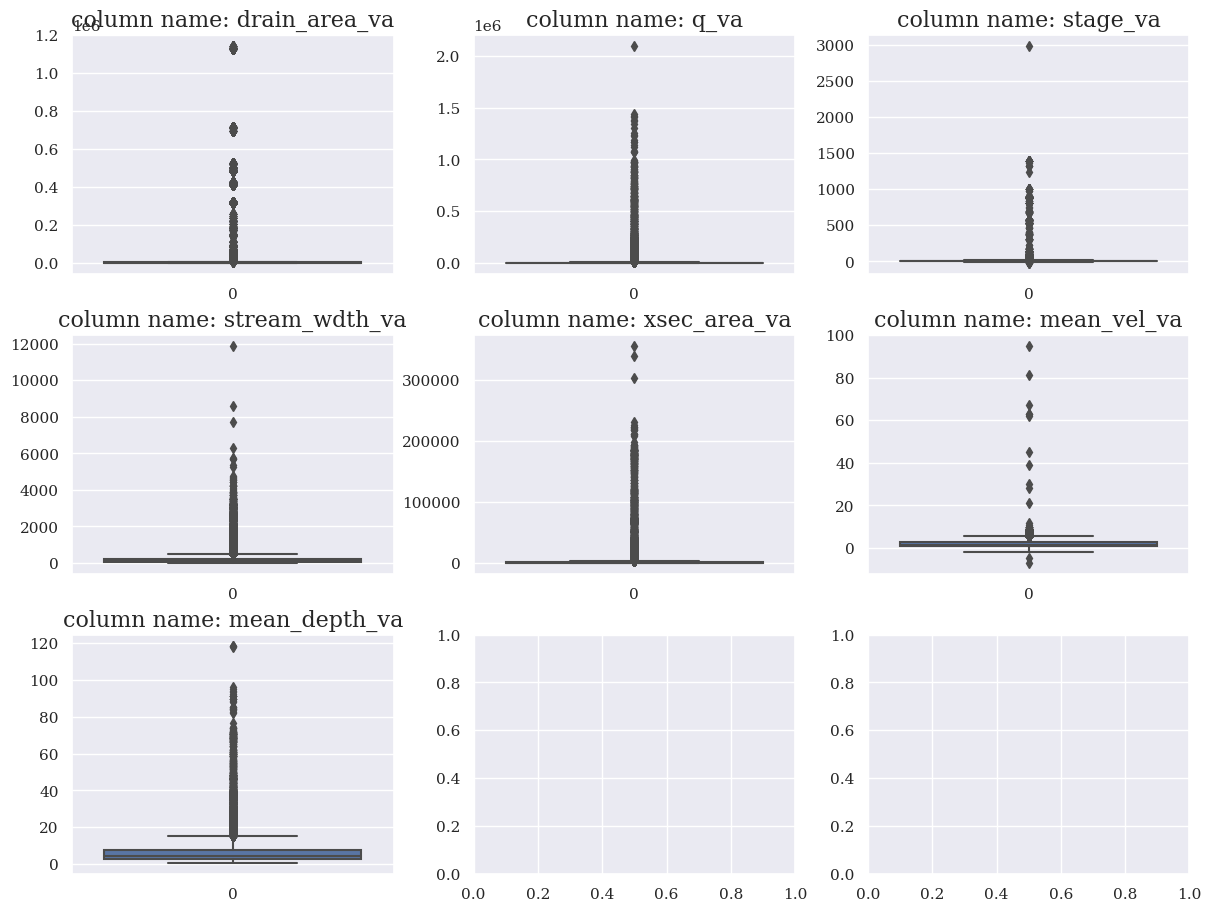

In [18]:
# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(12, 9), constrained_layout=True)

for index, (column_name, column_data) in enumerate(hydro_subset.drop(columns=['site_no', 'site_tp_cd']).iteritems()):
    # print(column_name, column_data); continue
    i, j = divmod(index, 3)

    sns.boxplot(data=column_data, orient='v', ax=axes[i, j])
    axes[i, j].set_title(f'column name: {column_name}', fontsize=16)
    # axes[i, j].set_xlabel('')

# plt.savefig(f'{data_root}/results/boxplots.png')
plt.show()

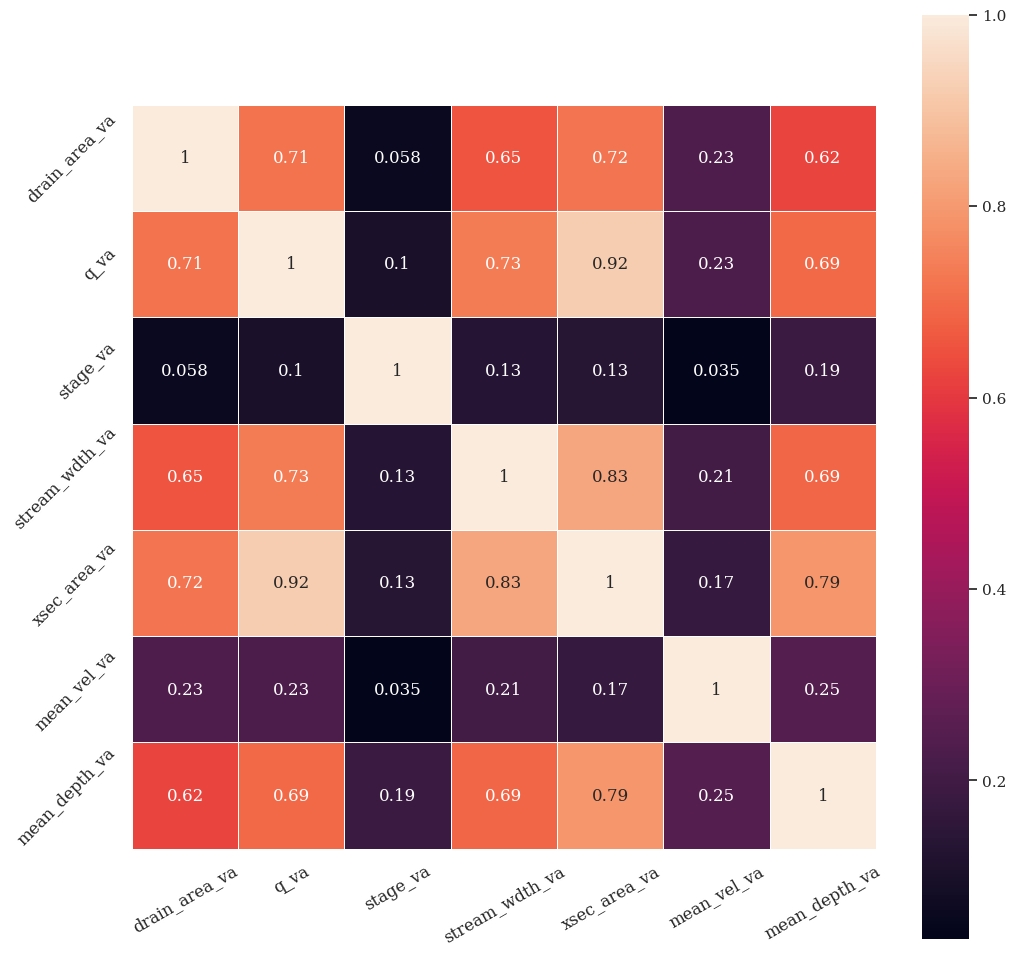

In [19]:
# correlation matrix
corr_mat = hydro_subset.drop(columns=['site_no', 'site_tp_cd']).corr()
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr_mat, square=True, annot=True, linewidths=.5)
ax.tick_params(axis='x', labelrotation=30, labelsize=12)
ax.tick_params(axis='y', labelrotation=45, labelsize=12)
plt.show()

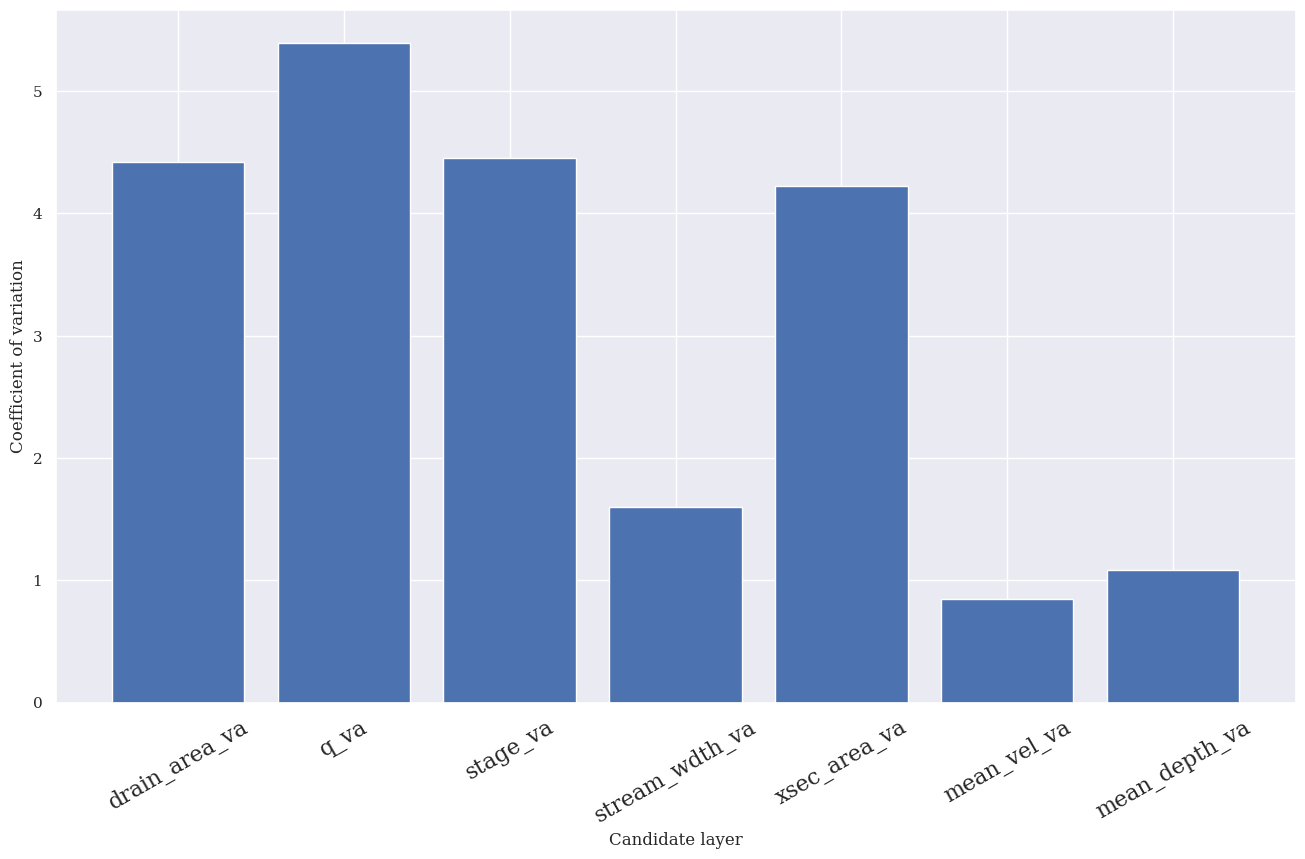

In [20]:
# coefficient of variation
cv_df = hydro_subset.drop(columns=['site_no', 'site_tp_cd']).std() / hydro_subset.drop(columns=['site_no', 'site_tp_cd']).mean()
cv_df = cv_df.reset_index().rename(columns={'index':'layer_name', 0:'cv'})
fig, ax = plt.subplots(figsize=(16,9))

ax.bar(cv_df['layer_name'], cv_df['cv'])
ax.tick_params(axis='x', labelrotation=30, labelsize=16)
ax.set_xlabel('Candidate layer')
ax.set_ylabel('Coefficient of variation')

# plt.savefig(f'{data_root}/results/cv.png')
plt.show()

Analysis the relationship between `stage` and `mean depth` for site stations having more than 5 observations

In [21]:
r2_lst = []
for site, group in hydro_subset.groupby("site_no"):
    if len(group["q_va"]) > 5:
        r2_lst.append(np.corrcoef(group['mean_depth_va'], group['stage_va'])[0, 1 ]**2)


Average of R^2: 0.7612, STD of R^2: 0.2799


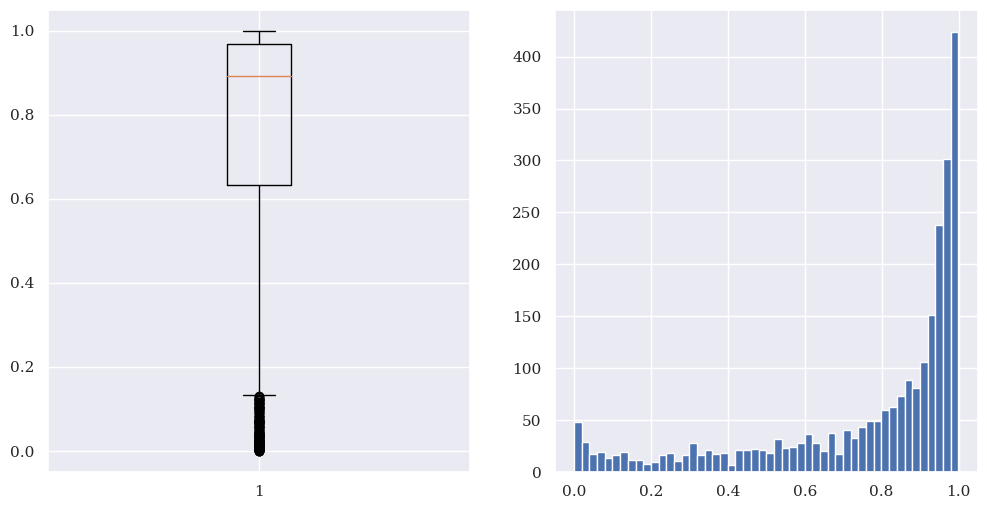

In [22]:
print(f'Average of R^2: {np.mean(r2_lst):.4f}, STD of R^2: {np.std(r2_lst):.4f}')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
ax1.boxplot(r2_lst)
ax2.hist(r2_lst, bins=50)
plt.show()

In [23]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 7)
split = splitter.split(hydro_subset, groups=hydro_subset['site_no'])
train_idx, test_idx = next(split)

train = hydro_subset.iloc[train_idx]
test = hydro_subset.iloc[test_idx]

print(train.shape, test.shape)

(36951, 9) (9242, 9)


In [24]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [25]:
train.describe()

,drain_area_va,q_va,stage_va,stream_wdth_va,xsec_area_va,mean_vel_va,mean_depth_va
count,3.695100e+04,3.695100e+04,36951.000000,36951.000000,36951.000000,36951.000000,36951.000000
mean,2.413580e+04,1.018178e+04,13.396960,236.621996,3208.422673,1.976613,6.529101
std,1.031459e+05,5.222907e+04,59.624582,374.765965,13245.610530,1.718728,7.022711
min,1.000000e-02,1.040000e-01,-21.370000,4.053000,1.080000,-6.990000,0.560000
25%,2.270000e+02,2.467965e+02,3.460000,70.350000,196.050500,0.880000,2.660000
50%,7.930000e+02,8.371080e+02,5.770000,124.592000,534.120000,1.661000,4.430000
75%,3.240000e+03,3.199799e+03,10.400000,245.278000,1570.015000,2.728000,7.700000
max,1.144500e+06,2.100000e+06,2991.380000,11900.000000,357000.000000,95.000000,118.770000


In [26]:
test.describe()

,drain_area_va,q_va,stage_va,stream_wdth_va,xsec_area_va,mean_vel_va,mean_depth_va
count,9.242000e+03,9.242000e+03,9242.000000,9242.000000,9242.000000,9242.000000,9242.000000
mean,2.652446e+04,1.365839e+04,14.122516,236.820188,3841.711704,1.905800,6.703023
std,1.287953e+05,7.944043e+04,62.891076,394.708446,17098.387190,1.447356,7.549020
min,1.000000e-02,4.200000e-01,-10.180000,5.948000,1.210000,-4.676000,0.510000
25%,2.000000e+02,2.268957e+02,3.380000,68.523250,194.083500,0.829000,2.623384
50%,6.950000e+02,7.815760e+02,5.620000,119.128500,497.821500,1.590500,4.353965
75%,2.642000e+03,2.898664e+03,10.437500,244.550000,1600.854500,2.650000,7.730000
max,1.125810e+06,1.435933e+06,1316.160000,4561.960000,223070.000000,30.000000,66.820000


In [27]:
train.to_csv('./data/SynDepth_train_set.csv', sep=',', encoding='utf-8', index=False)
test.to_csv('./data/SynDepth_test_set.csv', sep=',', encoding='utf-8', index=False)